In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd


<h1>This notebook is a detailed explanation for the program. Everything you can see in the main program comes from here.</h1>

In [211]:
# Get user input and specify output file name;

# input_file_name = input("Enter the file name, make sure it's in the same folder as this program, and include file extension: ")
# output_file_name = input("Name the output file, be sure to include extension: ")

input_file_name = "instance03.txt"
output_file_name = "solution03.txt"

In [212]:
# Read the file;
with open(input_file_name) as file:
    lines = []
    for line in file:
        lines.append(line)

for i in range(0, len(lines)):
    lines[i] = lines[i].strip("\n")


In [213]:

# Get n, x, y;
n = int(lines[0])

x = []
for i in range(1, len(lines)):
    x.append(int(lines[i].split(' ')[0]))

y = []
for i in range(1, len(lines)):
    y.append(int(lines[i].split(' ')[1]))


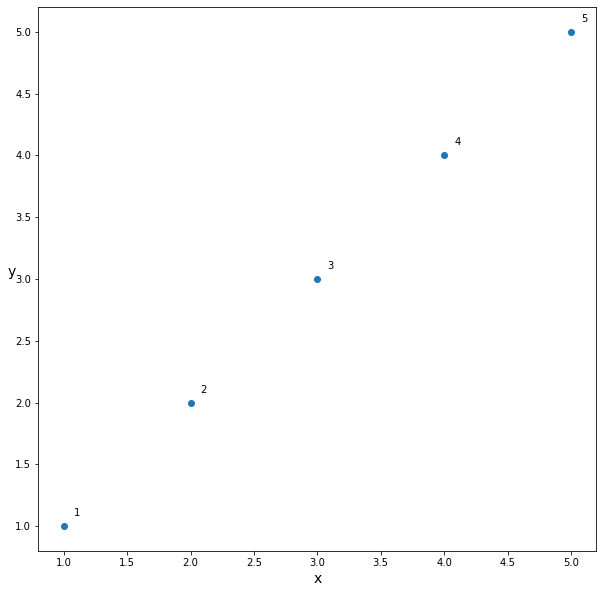

In [214]:
# Name points after x coordinate;
points = x

# Every point is named after its x coordinate, to see this, just look at point 2 and 3 where their coordinates are
# (2,6) and (3,8). This attribute is very beneficial for collecting pairs for each vertical lines, as we will see in the
# "all_lines[i][0] == 'v'" block below. However, in order to select pairs for those horizontal lines, we need to utilize 
# each pair's y coordinate by associating each y coordinate with its point label.
points_by_y = y
all_pairs_in_y = []
for i in range(0, n):
    for j in range(i+1, n):
        all_pairs_in_y.append([points_by_y[i], points_by_y[j]])

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x,y)
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14, rotation = 0)

for i, txt in enumerate(points):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
plt.show()


In [215]:
# Find all the pairs;
all_pairs = [] 

for i in range(1, n+1):
    for j in range(i+1, n+1):
        all_pairs.append([i,j])

print("Total number of pairs: " + "\n")
print(len(all_pairs))
print("\n" + "All the pairs: " + "\n")
print(all_pairs)

Total number of pairs: 

10

All the pairs: 

[[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]


In [216]:
# Generate all the lines;
all_lines = []

for i in range(1, n):
    all_lines.append(['v', i+0.5])

for j in range(1, n):
    all_lines.append(['h', j+0.5])

print("Total number of lines: " + "\n")
print(len(all_lines))
print("\n" + "All the lines: " + "\n")
print(all_lines)

Total number of lines: 

8

All the lines: 

[['v', 1.5], ['v', 2.5], ['v', 3.5], ['v', 4.5], ['h', 1.5], ['h', 2.5], ['h', 3.5], ['h', 4.5]]


In [217]:
# Form sets where each set is cut through by one particular line;

sets = []

for i in range(0, len(all_lines)):
    set = []
    for j in range(0, len(all_pairs)):
        if all_lines[i][0] == 'v':
            if all_lines[i][1] > all_pairs[j][0] and all_lines[i][1] < all_pairs[j][1]:
               set.append(all_pairs[j])
        if all_lines[i][0] == 'h':
            if all_lines[i][1] > min(all_pairs_in_y[j][0], all_pairs_in_y[j][1]) \
                and all_lines[i][1] < max(all_pairs_in_y[j][0], all_pairs_in_y[j][1]):
               set.append(all_pairs[j])
    sets.append(set)


print("Here are all the sets and their lines: " + '\n') 
for i in range(0,len(sets)):
    print('Line: ' + str(all_lines[i]) + ', set: S' + str(i+1) + ' = ' + str(sets[i]) +'\n') 

Here are all the sets and their lines: 

Line: ['v', 1.5], set: S1 = [[1, 2], [1, 3], [1, 4], [1, 5]]

Line: ['v', 2.5], set: S2 = [[1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]

Line: ['v', 3.5], set: S3 = [[1, 4], [1, 5], [2, 4], [2, 5], [3, 4], [3, 5]]

Line: ['v', 4.5], set: S4 = [[1, 5], [2, 5], [3, 5], [4, 5]]

Line: ['h', 1.5], set: S5 = [[1, 2], [1, 3], [1, 4], [1, 5]]

Line: ['h', 2.5], set: S6 = [[1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]

Line: ['h', 3.5], set: S7 = [[1, 4], [1, 5], [2, 4], [2, 5], [3, 4], [3, 5]]

Line: ['h', 4.5], set: S8 = [[1, 5], [2, 5], [3, 5], [4, 5]]



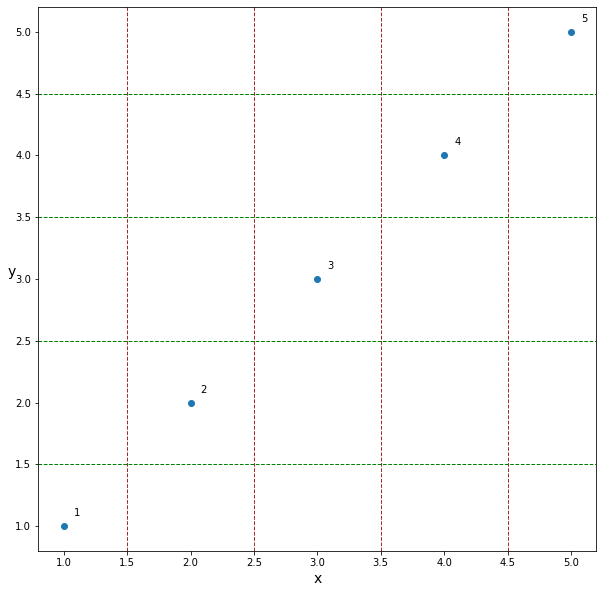

In [218]:
# Now, let's see all the lines and the points;

fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(x,y)
ax2.set_xlabel('x', fontsize = 14)
ax2.set_ylabel('y', fontsize = 14, rotation = 0)
 
for i, txt in enumerate(points):
    ax2.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')

for i in range(0, len(all_lines)):
    if all_lines[i][0] == 'v':
        ax2.axvline(all_lines[i][1], color = 'brown', lw = 1, linestyle = '--')
    if all_lines[i][0] == 'h':
        ax2.axhline(all_lines[i][1], color = 'green', lw = 1, linestyle = '--')

plt.show()

In [219]:
# Let's see all the data we will need to use with the greedy method;

print('All the pairs: ')
print(all_pairs)
print('')

print('All the lines: ')
print(all_lines)
print('')

print('All the sets: ')
for i in range(0,len(sets)):
    print(sets[i])

All the pairs: 
[[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]

All the lines: 
[['v', 1.5], ['v', 2.5], ['v', 3.5], ['v', 4.5], ['h', 1.5], ['h', 2.5], ['h', 3.5], ['h', 4.5]]

All the sets: 
[[1, 2], [1, 3], [1, 4], [1, 5]]
[[1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]
[[1, 4], [1, 5], [2, 4], [2, 5], [3, 4], [3, 5]]
[[1, 5], [2, 5], [3, 5], [4, 5]]
[[1, 2], [1, 3], [1, 4], [1, 5]]
[[1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]
[[1, 4], [1, 5], [2, 4], [2, 5], [3, 4], [3, 5]]
[[1, 5], [2, 5], [3, 5], [4, 5]]


In [220]:
# Next, I will write a method which picks the sets with the most pairs
# given all the currently presented sets;

def find_largest_sets(sets):
    max_count = -1
    prev_amount = 0
    largest_sets = [] 

    for i in range(0, len(sets)):
        if len(sets[i]) > max_count:
            max_count = len(sets[i]) # First, find the largest count;
    
    for j in range(0, len(sets)):
        if len(sets[j][0]) != 0 and len(sets[j]) == max_count: #  
            largest_sets.append(j) # Then, find the set whose pair count
                                   # matches max_count and append its index;

    return largest_sets
 

In [221]:
# This is the method that updates the other sets and all pairs with 
# the currently picked sets;

def update_sets(all_pairs, sets, pick, picked_set):
    for i in range(0, len(picked_set)):
        for j in range(0, len(sets)):
            if j == pick:
                 continue
            if picked_set[i] in sets[j]:
                if len(sets[j]) == 1:
                    sets[j] = [[]]
                else:
                    sets[j].remove(picked_set[i])

    for i in range(0, len(picked_set)):
        all_pairs.remove(picked_set[i])
    
    sets[pick] = [[]]
    
            
    


In [222]:
# We will be repeatedly calling the method above and just randomly pick one set 
# from these largest sets and collect the correlated line; 
# and then update all_pairs and the remaing sets by getting rid of the overlapping pairs; 
# We repeat the process untill all sets have been picked;



ans = []
iteration = 0
while len(all_pairs) > 0:
    iteration += 1
    print('Iteration' + str(iteration) + '-------------------------------------')
    print('\n'+ "Current pairs: " + '\n') 
    print(all_pairs)

    print('\n' + "Current sets: " + '\n') 
    for i in range(0,len(sets)):
        print('\t' + 'S' + str(i+1) + ' = ' + str(sets[i]) +'\n') 

    largest_sets = find_largest_sets(sets)
    print('\n' + '\t' + "Largest_sets: " + str(largest_sets))
    pick = rd.sample(largest_sets,1)[0]
    print('\n' + '\t' + "Pick: "+ str(pick))
    picked_set = sets[pick]
    print('\n' + '\t' + "Picked_set: "+ str(picked_set))
    picked_line = all_lines[pick]
    print('\n' +  '\t' + "Picked_line: "+ str(picked_line) + '\n')
    ans.append(picked_line)
    update_sets(all_pairs, sets, pick, picked_set)



Iteration1-------------------------------------

Current pairs: 

[[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]

Current sets: 

	S1 = [[1, 2], [1, 3], [1, 4], [1, 5]]

	S2 = [[1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]

	S3 = [[1, 4], [1, 5], [2, 4], [2, 5], [3, 4], [3, 5]]

	S4 = [[1, 5], [2, 5], [3, 5], [4, 5]]

	S5 = [[1, 2], [1, 3], [1, 4], [1, 5]]

	S6 = [[1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]

	S7 = [[1, 4], [1, 5], [2, 4], [2, 5], [3, 4], [3, 5]]

	S8 = [[1, 5], [2, 5], [3, 5], [4, 5]]


	Largest_sets: [1, 2, 5, 6]

	Pick: 5

	Picked_set: [[1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]

	Picked_line: ['h', 2.5]

Iteration2-------------------------------------

Current pairs: 

[[1, 2], [3, 4], [3, 5], [4, 5]]

Current sets: 

	S1 = [[1, 2]]

	S2 = [[]]

	S3 = [[3, 4], [3, 5]]

	S4 = [[3, 5], [4, 5]]

	S5 = [[1, 2]]

	S6 = [[]]

	S7 = [[3, 4], [3, 5]]

	S8 = [[3, 5], [4, 5]]


	Largest_sets: [2, 3, 6, 7]

	Pick: 7

	Picked_set: [[

In [223]:
# Show results;
print("Number of selected lines: " + str(len(ans)) + "\n")
print("Following are the lines selected: " + "\n")
print(ans)

Number of selected lines: 4

Following are the lines selected: 

[['h', 2.5], ['h', 4.5], ['v', 1.5], ['h', 3.5]]


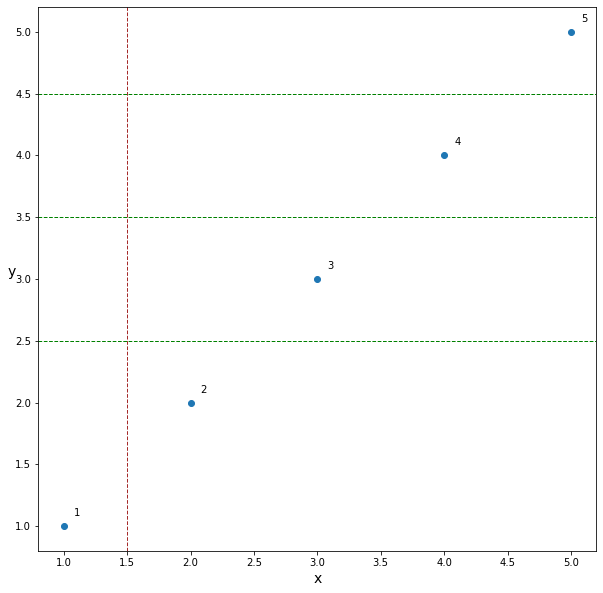

In [224]:
# Plotting result;

fig3, ax3 = plt.subplots(figsize=(10,10))
ax3.scatter(x,y)
ax3.set_xlabel('x', fontsize = 14)
ax3.set_ylabel('y', fontsize = 14, rotation = 0)
 
for i, txt in enumerate(points):
    ax3.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')

for i in range(0, len(ans)):
    if ans[i][0] == 'v':
        ax3.axvline(ans[i][1], color = 'brown', lw = 1, linestyle = '--')
    if ans[i][0] == 'h':
        ax3.axhline(ans[i][1], color = 'green', lw = 1, linestyle = '--')

plt.show()

In [225]:
# Save the result;

f = open(output_file_name, "w+")
f.write(str(len(ans)) + '\n')
for index in range(0, len(ans)):
    f.write(str(ans[index][0]) +' '+ str(ans[index][1]) + '\n')
f.close()


<h1> The following section is about coming up with the input and ouput filename sequences </h1>

In [226]:
def get_filename_sequence(input_filename):
    seq = []
    for postfix in range(1, 100):
        if(0<postfix<10):
            filename = input_filename + "0" + str(postfix) +".txt"
        else:
            filename = input_filename + str(postfix) +".txt"
        seq.append(filename)
    return seq


In [227]:
# Come up with all the input filenames;
inputs = get_filename_sequence("instance")
print(inputs)

['instance01.txt', 'instance02.txt', 'instance03.txt', 'instance04.txt', 'instance05.txt', 'instance06.txt', 'instance07.txt', 'instance08.txt', 'instance09.txt', 'instance10.txt', 'instance11.txt', 'instance12.txt', 'instance13.txt', 'instance14.txt', 'instance15.txt', 'instance16.txt', 'instance17.txt', 'instance18.txt', 'instance19.txt', 'instance20.txt', 'instance21.txt', 'instance22.txt', 'instance23.txt', 'instance24.txt', 'instance25.txt', 'instance26.txt', 'instance27.txt', 'instance28.txt', 'instance29.txt', 'instance30.txt', 'instance31.txt', 'instance32.txt', 'instance33.txt', 'instance34.txt', 'instance35.txt', 'instance36.txt', 'instance37.txt', 'instance38.txt', 'instance39.txt', 'instance40.txt', 'instance41.txt', 'instance42.txt', 'instance43.txt', 'instance44.txt', 'instance45.txt', 'instance46.txt', 'instance47.txt', 'instance48.txt', 'instance49.txt', 'instance50.txt', 'instance51.txt', 'instance52.txt', 'instance53.txt', 'instance54.txt', 'instance55.txt', 'instance

In [228]:
# Come up with all the output filenames;
outputs = get_filename_sequence("solution")
print(outputs)

['solution01.txt', 'solution02.txt', 'solution03.txt', 'solution04.txt', 'solution05.txt', 'solution06.txt', 'solution07.txt', 'solution08.txt', 'solution09.txt', 'solution10.txt', 'solution11.txt', 'solution12.txt', 'solution13.txt', 'solution14.txt', 'solution15.txt', 'solution16.txt', 'solution17.txt', 'solution18.txt', 'solution19.txt', 'solution20.txt', 'solution21.txt', 'solution22.txt', 'solution23.txt', 'solution24.txt', 'solution25.txt', 'solution26.txt', 'solution27.txt', 'solution28.txt', 'solution29.txt', 'solution30.txt', 'solution31.txt', 'solution32.txt', 'solution33.txt', 'solution34.txt', 'solution35.txt', 'solution36.txt', 'solution37.txt', 'solution38.txt', 'solution39.txt', 'solution40.txt', 'solution41.txt', 'solution42.txt', 'solution43.txt', 'solution44.txt', 'solution45.txt', 'solution46.txt', 'solution47.txt', 'solution48.txt', 'solution49.txt', 'solution50.txt', 'solution51.txt', 'solution52.txt', 'solution53.txt', 'solution54.txt', 'solution55.txt', 'solution